In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [3]:
device=torch.device("cuda:0" if torch.cuda.is_available()else "cpu")
print(device)

cuda:0


In [0]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(np.array([125.3, 123.0, 113.9]) / 255.0,
                    np.array([63.0, 62.1, 66.7]) / 255.0),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(np.array([125.3, 123.0, 113.9]) / 255.0,
                    np.array([63.0, 62.1, 66.7]) / 255.0),
    ])

Downloading STL10 dataset

In [109]:
trainset = torchvision.datasets.STL10(root='./data', split='train', 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.STL10(root='./data', split='test', 
                                        download=True, 
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
num_classes=10
batch_size=4
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

In [112]:
print(images.shape)
print(images[1].shape)
print(labels[3].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
3


In [0]:
def imshow(img, title):
  npimg=img.numpy()/2+0.5
  plt.figure(figsize=(20,2))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_image(dataloader):
  images,labels=next(iter(dataloader))
  img=torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


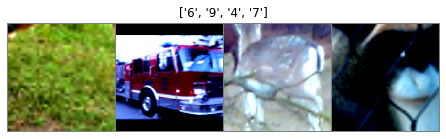

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


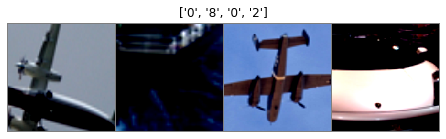

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


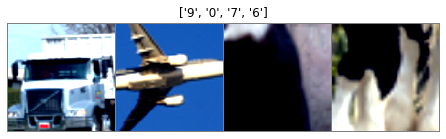

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


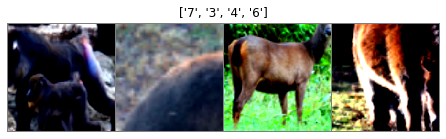

In [115]:
for i in range(4):
  show_batch_image(trainloader)

In [0]:
from torchvision import models

VGG Model on STL10 

In [0]:
vgg=models.vgg16_bn()

In [118]:
print(vgg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [119]:
print(vgg.classifier[6])#We have to  change output features to 10

Linear(in_features=4096, out_features=1000, bias=True)


In [120]:
final_in_features=vgg.classifier[6].in_features
mod_classifier=list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [121]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
batch_size=4
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

In [0]:
def evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total

In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.01)

Iteration: 0/1250, Loss: 2.23
Iteration: 100/1250, Loss: 2.02
Iteration: 200/1250, Loss: 2.23
Iteration: 300/1250, Loss: 2.24
Iteration: 400/1250, Loss: 1.38
Iteration: 500/1250, Loss: 1.91
Iteration: 600/1250, Loss: 2.49
Iteration: 700/1250, Loss: 1.62
Iteration: 800/1250, Loss: 2.32
Iteration: 900/1250, Loss: 2.77
Iteration: 1000/1250, Loss: 2.29
Iteration: 1100/1250, Loss: 2.05
Iteration: 1200/1250, Loss: 1.67
Epoch: 0/20, Test acc: 26.57, Train acc: 26.52
Iteration: 0/1250, Loss: 2.45
Iteration: 100/1250, Loss: 2.06
Iteration: 200/1250, Loss: 1.76
Iteration: 300/1250, Loss: 2.43
Iteration: 400/1250, Loss: 1.58
Iteration: 500/1250, Loss: 2.12
Iteration: 600/1250, Loss: 2.65
Iteration: 700/1250, Loss: 2.16
Iteration: 800/1250, Loss: 2.28
Iteration: 900/1250, Loss: 1.79
Iteration: 1000/1250, Loss: 1.40
Iteration: 1100/1250, Loss: 1.27
Iteration: 1200/1250, Loss: 1.93
Epoch: 1/20, Test acc: 26.25, Train acc: 26.84
Iteration: 0/1250, Loss: 1.54
Iteration: 100/1250, Loss: 1.85
Iteration:

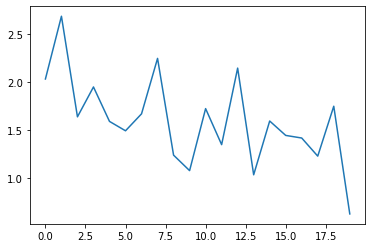

In [128]:
loss_epoch_arr = []
max_epochs = 20

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    
plt.plot(list(loss_epoch_arr))
plt.show()


**SqueezeNet on STL10**

In [0]:
#Now training inception model:
squeezenet = models.squeezenet1_0(pretrained=True)

In [153]:
print(squeezenet)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [0]:
for param in squeezenet.parameters():
    param.requires_grad = False

In [0]:
squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))

In [0]:
squeezenet= squeezenet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(squeezenet.parameters(), lr=0.01)

Iteration: 0/1250, Loss: 2.45
Iteration: 100/1250, Loss: 2.07
Iteration: 200/1250, Loss: 0.80
Iteration: 300/1250, Loss: 0.09
Iteration: 400/1250, Loss: 0.18
Iteration: 500/1250, Loss: 0.60
Iteration: 600/1250, Loss: 2.71
Iteration: 700/1250, Loss: 0.11
Iteration: 800/1250, Loss: 1.16
Iteration: 900/1250, Loss: 0.99
Iteration: 1000/1250, Loss: 1.34
Iteration: 1100/1250, Loss: 1.61
Iteration: 1200/1250, Loss: 1.33
Epoch: 0/20, Test acc: 71.64, Train acc: 73.40
Iteration: 0/1250, Loss: 0.16
Iteration: 100/1250, Loss: 0.23
Iteration: 200/1250, Loss: 0.79
Iteration: 300/1250, Loss: 0.66
Iteration: 400/1250, Loss: 1.31
Iteration: 500/1250, Loss: 0.13
Iteration: 600/1250, Loss: 0.90
Iteration: 700/1250, Loss: 0.16
Iteration: 800/1250, Loss: 1.23
Iteration: 900/1250, Loss: 0.81
Iteration: 1000/1250, Loss: 0.18
Iteration: 1100/1250, Loss: 0.12
Iteration: 1200/1250, Loss: 0.13
Epoch: 1/20, Test acc: 73.65, Train acc: 77.54
Iteration: 0/1250, Loss: 0.50
Iteration: 100/1250, Loss: 0.52
Iteration:

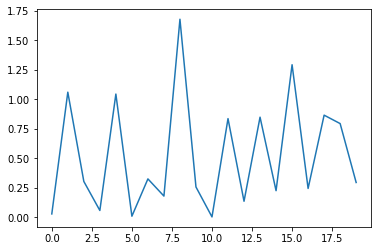

In [157]:
loss_epoch_arr = []
max_epochs = 20

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = squeezenet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, squeezenet), evaluation(trainloader, squeezenet)))
    
plt.plot(list(loss_epoch_arr))
plt.show()

Downloading CIFAR 100

In [160]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, 
                                        download=True, 
                                        transform=transform_test)


0it [00:00, ?it/s]


 99%|█████████▉| 167616512/169001437 [00:06<00:00, 32432978.51it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


DenseNet Model on CIFAR 100 

In [0]:
#Now we will train Densenet on CIFAR100

In [0]:
#Now training inception model:
densenet= models.densenet169(pretrained=True)

In [165]:
print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
densenet.classifier=nn.Linear(in_features=1664,out_features=100,bias=True)

In [168]:
print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [0]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
densenet = densenet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(densenet.parameters(), lr=0.05)

In [0]:
loss_epoch_arr = []
max_epochs = 11

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = densenet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, densenet), evaluation(trainloader,densenet)))
    
plt.plot(loss_epoch_arr)
plt.show()

Iteration: 0/3125, Loss: 4.50
Iteration: 100/3125, Loss: 4.15
Iteration: 200/3125, Loss: 4.35
Iteration: 300/3125, Loss: 2.86
Iteration: 400/3125, Loss: 3.61
Iteration: 500/3125, Loss: 3.06
Iteration: 600/3125, Loss: 3.66
Iteration: 700/3125, Loss: 3.52
Iteration: 800/3125, Loss: 3.40
Iteration: 900/3125, Loss: 3.53
Iteration: 1000/3125, Loss: 2.55
Iteration: 1100/3125, Loss: 3.18
Iteration: 1200/3125, Loss: 2.70
Iteration: 1300/3125, Loss: 2.24
Iteration: 1400/3125, Loss: 2.47
Iteration: 1500/3125, Loss: 2.62
Iteration: 1600/3125, Loss: 3.15
Iteration: 1700/3125, Loss: 2.36
Iteration: 1800/3125, Loss: 2.40
Iteration: 1900/3125, Loss: 2.05
Iteration: 2000/3125, Loss: 2.39
Iteration: 2100/3125, Loss: 2.73
Iteration: 2200/3125, Loss: 2.91
Iteration: 2300/3125, Loss: 2.49
Iteration: 2400/3125, Loss: 1.99
Iteration: 2500/3125, Loss: 2.10
Iteration: 2600/3125, Loss: 1.54
Iteration: 2700/3125, Loss: 2.33
Iteration: 2800/3125, Loss: 1.99
Iteration: 2900/3125, Loss: 1.87
Iteration: 3000/3125, 

Inception Model on STL10

In [0]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

**Downloading STL10**

In [19]:
trainset = torchvision.datasets.STL10(root='./data', split='train', 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.STL10(root='./data', split='test', 
                                        download=True, 
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import copy

In [0]:
batch_size=4
num_classes=10
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [12]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth

  0%|          | 0.00/104M [00:00<?, ?B/s]
  0%|          | 496k/104M [00:00<00:22, 4.73MB/s]
  3%|▎         | 2.92M/104M [00:00<00:16, 6.26MB/s]
  7%|▋         | 6.77M/104M [00:00<00:12, 8.38MB/s]
 12%|█▏        | 12.1M/104M [00:00<00:08, 11.3MB/s]
 20%|██        | 21.0M/104M [00:00<00:05, 15.3MB/s]
 32%|███▏      | 33.7M/104M [00:00<00:03, 20.8MB/s]
 52%|█████▏    | 53.9M/104M [00:00<00:01, 28.5MB/s]
 63%|██████▎   | 64.9M/104M [00:00<00:01, 36.5MB/s]
 73%|███████▎  | 75.7M/104M [00:00<00:00, 45.3MB/s]
 83%|████████▎ | 86.2M/104M [00:01<00:00, 40.7MB/s]
 91%|█████████▏| 94.8M/104M [00:01<00:00, 48.6MB/s]
 99%|█████████▉| 103M/104M [00:01<00:00, 51.9MB/s] 
100%|██████████| 104M/104M [00:01<00:00, 71.9MB/s]

In [13]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
for param in inception.parameters():
    param.requires_grad = False

In [0]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [23]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [0]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [0]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(), lr=0.01)

In [0]:
def evaluation_inception(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs) #Here o/p  is in form of tuple thats we need aux o/p as well as real o/p fro bp.
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
#Now we will use deepcopy method to get our best models which will be furthers used for pretraining our models

Min loss 0.32
Iteration: 0/1250, Loss: 0.32
Min loss 0.19
Min loss 0.17
Min loss 0.14
Iteration: 100/1250, Loss: 0.88
Min loss 0.09
Min loss 0.05
Iteration: 200/1250, Loss: 1.35
Iteration: 300/1250, Loss: 1.34
Iteration: 400/1250, Loss: 0.45
Iteration: 500/1250, Loss: 2.44
Iteration: 600/1250, Loss: 2.04
Iteration: 700/1250, Loss: 0.73
Iteration: 800/1250, Loss: 0.94
Iteration: 900/1250, Loss: 1.30
Iteration: 1000/1250, Loss: 0.47
Min loss 0.04
Min loss 0.04
Iteration: 1100/1250, Loss: 1.22
Iteration: 1200/1250, Loss: 1.54
Epoch: 0/2, Test acc: 66.89, Train acc: 66.58
Iteration: 0/1250, Loss: 1.41
Iteration: 100/1250, Loss: 0.22
Iteration: 200/1250, Loss: 0.70
Iteration: 300/1250, Loss: 0.42
Iteration: 400/1250, Loss: 0.24
Min loss 0.03
Iteration: 500/1250, Loss: 0.51
Iteration: 600/1250, Loss: 1.59
Iteration: 700/1250, Loss: 1.24
Iteration: 800/1250, Loss: 0.72
Iteration: 900/1250, Loss: 0.34
Iteration: 1000/1250, Loss: 1.99
Min loss 0.02
Iteration: 1100/1250, Loss: 1.96
Iteration: 12

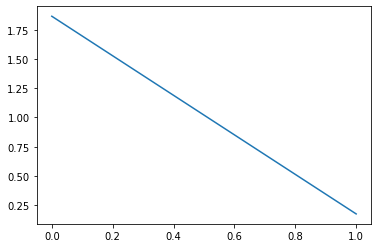

In [31]:
loss_epoch_arr = []
max_epochs = 2

min_loss = 1000

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs, aux_outputs = inception(inputs)
        loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)#in loss function we have to take care of both auxiliary loss and real loss.
        loss.backward()#the auxiliary o/p given lesser weightage of 0.3 
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(inception.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation_inception(testloader, inception), 
        evaluation_inception(trainloader, inception)))
    
    
plt.plot(list(loss_epoch_arr))
plt.show()

In [32]:
#Now we are training with our best model
inception.load_state_dict(best_model)
print(evaluation_inception(trainloader, inception), evaluation_inception(testloader, inception))

66.06 65.8125


In [35]:
resnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth

  0%|          | 0.00/44.7M [00:00<?, ?B/s]
  4%|▍         | 2.00M/44.7M [00:00<00:02, 20.3MB/s]
  8%|▊         | 3.38M/44.7M [00:00<00:02, 17.2MB/s]
 10%|▉         | 4.27M/44.7M [00:00<00:03, 13.7MB/s]
 14%|█▍        | 6.38M/44.7M [00:00<00:02, 15.3MB/s]
 18%|█▊        | 8.12M/44.7M [00:00<00:02, 15.6MB/s]
 22%|██▏       | 10.0M/44.7M [00:00<00:02, 16.6MB/s]
 26%|██▌       | 11.5M/44.7M [00:00<00:02, 14.5MB/s]
 29%|██▊       | 12.8M/44.7M [00:00<00:02, 11.8MB/s]
 31%|███▏      | 14.0M/44.7M [00:01<00:03, 9.25MB/s]
 34%|███▎      | 15.0M/44.7M [00:01<00:03, 7.99MB/s]
 38%|███▊      | 16.8M/44.7M [00:01<00:03, 9.54MB/s]
 43%|████▎     | 19.1M/44.7M [00:01<00:02, 11.6MB/s]
 46%|████▌     | 20.5M/44.7M [00:01<00:02, 12.4MB/s]
 49%|████▉     | 21.9M/44.7M [00:01<00:02, 11.8MB/s]
 52%|█████▏    | 23.2M/44.7M [00:01<00:01, 11.5MB/s]
 56%|█████▌    | 24.8M/44.7M [0

In [36]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
for param in resnet.parameters():
    param.requires_grad = False

In [0]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [39]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [0]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr=0.01)

Min loss 1.17
Iteration: 0/1250, Loss: 1.17
Min loss 0.76
Min loss 0.71
Min loss 0.69
Min loss 0.45
Min loss 0.44
Min loss 0.39
Min loss 0.24
Min loss 0.10
Iteration: 100/1250, Loss: 0.73
Iteration: 200/1250, Loss: 1.00
Min loss 0.09
Min loss 0.06
Iteration: 300/1250, Loss: 1.99
Iteration: 400/1250, Loss: 0.99
Iteration: 500/1250, Loss: 1.80
Min loss 0.04
Iteration: 600/1250, Loss: 0.52
Iteration: 700/1250, Loss: 0.76
Iteration: 800/1250, Loss: 2.21
Iteration: 900/1250, Loss: 0.48
Iteration: 1000/1250, Loss: 0.51
Iteration: 1100/1250, Loss: 0.81
Iteration: 1200/1250, Loss: 0.49
Min loss 0.04
Epoch: 0/4, Test acc: 63.40, Train acc: 63.98
Iteration: 0/1250, Loss: 0.23
Iteration: 100/1250, Loss: 0.24
Iteration: 200/1250, Loss: 0.27
Iteration: 300/1250, Loss: 2.34
Iteration: 400/1250, Loss: 0.31
Min loss 0.02
Iteration: 500/1250, Loss: 0.60
Iteration: 600/1250, Loss: 0.73
Iteration: 700/1250, Loss: 0.76
Iteration: 800/1250, Loss: 0.45
Iteration: 900/1250, Loss: 2.14
Iteration: 1000/1250, L

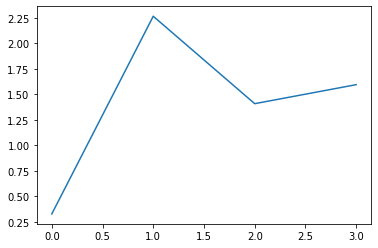

In [45]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 1000

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, resnet), evaluation(trainloader, resnet)))
    
    
plt.plot(list(loss_epoch_arr))
plt.show()

In [46]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))

60.1 59.95


**GoogLeNet on CIFAR100**

In [47]:
googlenet = models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth

  0%|          | 0.00/49.7M [00:00<?, ?B/s]
  4%|▍         | 1.88M/49.7M [00:00<00:02, 19.1MB/s]
  8%|▊         | 3.77M/49.7M [00:00<00:02, 18.9MB/s]
 11%|█▏        | 5.70M/49.7M [00:00<00:02, 19.0MB/s]
 16%|█▋        | 8.14M/49.7M [00:00<00:02, 20.5MB/s]
 20%|██        | 10.0M/49.7M [00:00<00:02, 19.9MB/s]
 25%|██▍       | 12.3M/49.7M [00:00<00:01, 20.7MB/s]
 29%|██▉       | 14.3M/49.7M [00:00<00:01, 20.4MB/s]
 33%|███▎      | 16.6M/49.7M [00:00<00:01, 21.4MB/s]
 37%|███▋      | 18.6M/49.7M [00:00<00:01, 20.6MB/s]
 42%|████▏     | 20.7M/49.7M [00:01<00:01, 20.9MB/s]
 46%|████▌     | 22.6M/49.7M [00:01<00:01, 19.4MB/s]
 49%|████▉     | 24.5M/49.7M [00:01<00:01, 19.1MB/s]
 53%|█████▎    | 26.3M/49.7M [00:01<00:01, 19.0MB/s]
 57%|█████▋    | 28.3M/49.7M [00:01<00:01, 19.5MB/s]
 61%|██████    | 30.3M/49.7M [00:01<00:01, 19.5MB/s]
 65%|██████▌   | 32.4M/49.7M 

In [48]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [0]:
googlenet.fc=nn.Linear(in_features=1024,out_features=100,bias=True)

In [56]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [0]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [62]:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, 
                                        download=True, 
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
for param in resnet.parameters():
    param.requires_grad = False

In [0]:
googlenet = googlenet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(googlenet.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 10.73
Iteration: 100/3125, Loss: 4.67
Iteration: 200/3125, Loss: 4.56
Iteration: 300/3125, Loss: 4.53
Iteration: 400/3125, Loss: 4.43
Iteration: 500/3125, Loss: 4.64
Iteration: 600/3125, Loss: 4.69
Iteration: 700/3125, Loss: 4.35
Iteration: 800/3125, Loss: 4.59
Iteration: 900/3125, Loss: 4.47
Iteration: 1000/3125, Loss: 4.32
Iteration: 1100/3125, Loss: 4.61
Iteration: 1200/3125, Loss: 4.56
Iteration: 1300/3125, Loss: 4.26
Iteration: 1400/3125, Loss: 4.25
Iteration: 1500/3125, Loss: 4.46
Iteration: 1600/3125, Loss: 3.86
Iteration: 1700/3125, Loss: 4.14
Iteration: 1800/3125, Loss: 3.90
Iteration: 1900/3125, Loss: 3.61
Iteration: 2000/3125, Loss: 3.82
Iteration: 2100/3125, Loss: 3.57
Iteration: 2200/3125, Loss: 4.16
Iteration: 2300/3125, Loss: 3.63
Iteration: 2400/3125, Loss: 4.06
Iteration: 2500/3125, Loss: 3.61
Iteration: 2600/3125, Loss: 3.49
Iteration: 2700/3125, Loss: 3.62
Iteration: 2800/3125, Loss: 3.21
Iteration: 2900/3125, Loss: 3.34
Iteration: 3000/3125,

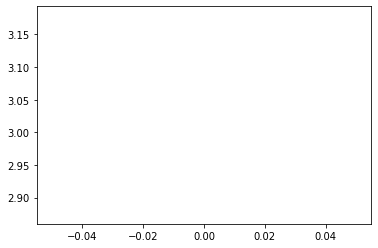

In [71]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs =googlenet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader,googlenet ), evaluation(trainloader, googlenet )))
    
    
plt.plot(list(loss_epoch_arr))
plt.show()